# MODBUS - DATA VISUALIZATION

# 1. Live Plot
The block of codes below can plot the data in real time while the CSV file is still being written.

<IPython.core.display.Javascript object>


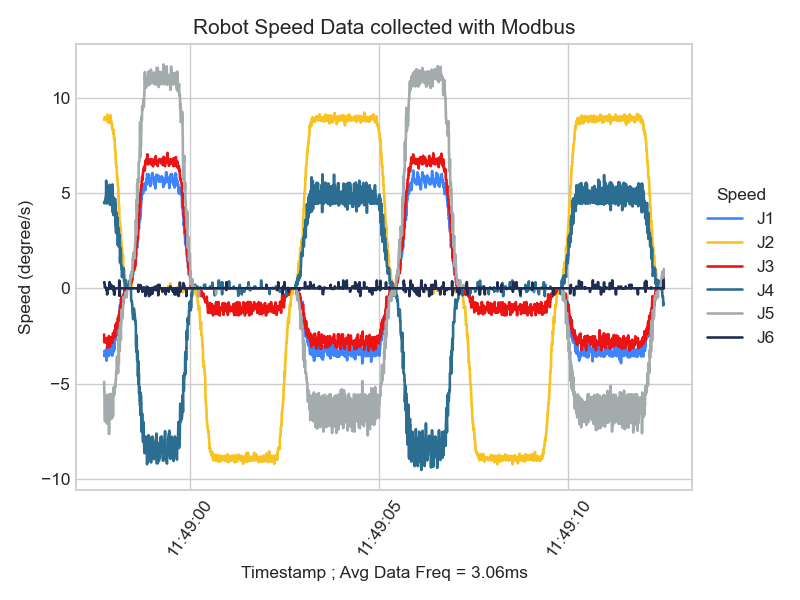

In [1]:
%matplotlib notebook
import random
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from datetime import datetime

# Define plot settings
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

show_range = -5000

def animate(i):
    # read the data from CSV file
    data = pd.read_csv('Fri Jul 22 111241 2022.csv', 
                       names=['timestamp', 'speedJ1', 'speedJ2', 'speedJ3', 'speedJ4', 'speedJ5', 'speedJ6'])
    
    # Translate timestamp numbers from float to readable dates
    data_freq = data['timestamp'].diff().mean() # calculate data refresh rate
    data['timestamp'] = data['timestamp'].apply(lambda x: datetime.fromtimestamp(x))
    
    # plot the results
    plt.cla()
    ax.plot(data['timestamp'][show_range:], data['speedJ1'][show_range:], '#3d84ff', label='J1')
    ax.plot(data['timestamp'][show_range:], data['speedJ2'][show_range:], '#f8c220', label='J2')
    ax.plot(data['timestamp'][show_range:], data['speedJ3'][show_range:], '#ec1313', label='J3')
    ax.plot(data['timestamp'][show_range:], data['speedJ4'][show_range:], '#2b6e91', label='J4')
    ax.plot(data['timestamp'][show_range:], data['speedJ5'][show_range:], '#a3abad', label='J5')
    ax.plot(data['timestamp'][show_range:], data['speedJ6'][show_range:], '#1e2c52', label='J6')
    ax.set_title('Robot Speed Data collected with Modbus')
    ax.set_xlabel('Timestamp ; Avg Data Freq = {}ms'.format(round(data_freq*1000, 2)))
    ax.set_ylabel('Speed (degree/s)')
    for tick in ax.get_xticklabels():
        tick.set_rotation(55)
    ax.legend(title='Speed',loc='center left', bbox_to_anchor=(1, 0.5))
    fig.tight_layout()
    fig.canvas.draw()

try:
    ani = FuncAnimation(plt.gcf(), animate, 3000)
    plt.tight_layout()
    plt.show()
    
except(KeyboardInterrupt, SystemExit,IndexError,ValueError):
    plt.end_interaction()
    plt.ioff()
    plt.close()

# 2. Full Data
The block of codes below is more suitable to help you to visualize the complete data after the CSV file finished adding more data

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
from ipywidgets import interactive
from IPython.display import display
from datetime import datetime
import ipywidgets as widgets
import pandas as pd
import numpy as np

# Load the stored data
data= pd.read_csv('Fri Jul 22 111241 2022.csv', 
                  names=['timestamp', 'speedJ1', 'speedJ2', 'speedJ3', 'speedJ4', 'speedJ5', 'speedJ6'])

# Translate timestamp numbers from float to readable dates
data_freq = data['timestamp'].diff().mean() # calculate data refresh rate
data['timestamp'] = data['timestamp'].apply(lambda x: datetime.fromtimestamp(x))

#plot_title = 'Robot Speed Data collected with Modbus : '+Variable+'/n Data Freq = '+data_freq
#plot_title = 'Robot Speed Data collected with Modbus : {}/n Data Freq = {}'.format(Variable,data_freq)

def plotter(Variable):
    #plt.figure().clear()
    plt.close()
    plt.cla()
    plt.clf()
    plt.style.use('bmh')
    plt.xticks(rotation=45)
    plt.plot(data.loc[:, 'timestamp'], data.loc[:, Variable], label=Variable)
    plt.title('Robot Speed Data collected with Modbus')
    plt.xlabel('Timestamp ; Avg Data Freq = {}ms'.format(round(data_freq*1000, 2)))
    plt.ylabel('Speed (degree/s)')
    plt.legend(loc='upper left')
    plt.tight_layout()
    
interactive_plot = interactive(plotter, Variable=['speedJ1', 'speedJ2', 'speedJ3', 'speedJ4', 'speedJ5', 'speedJ6'])
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(Dropdown(description='Variable', options=('speedJ1', 'speedJ2', 'speedJ3', 'speedJ4', 's…